# Implement the random forest algorithm



In [14]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("klar_for_oppgave_5.csv",index_col=0)


X = df.drop(columns=["Close"])  # Drop the target column

# Define the target (Close price)
y = df["Close"]




# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(mse,r2)

0.00011870551517571884 0.9976094692275009


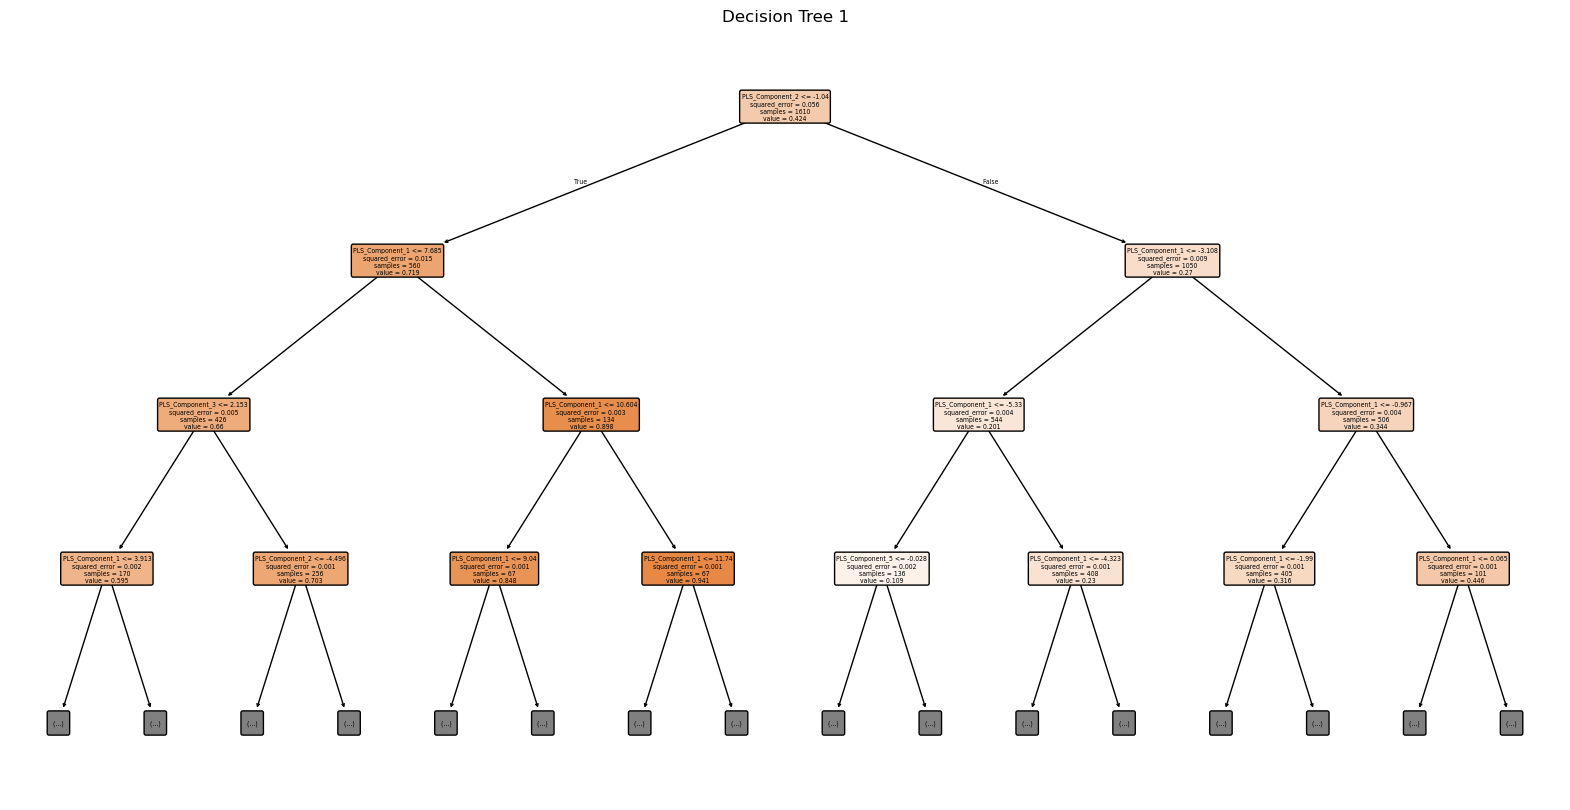

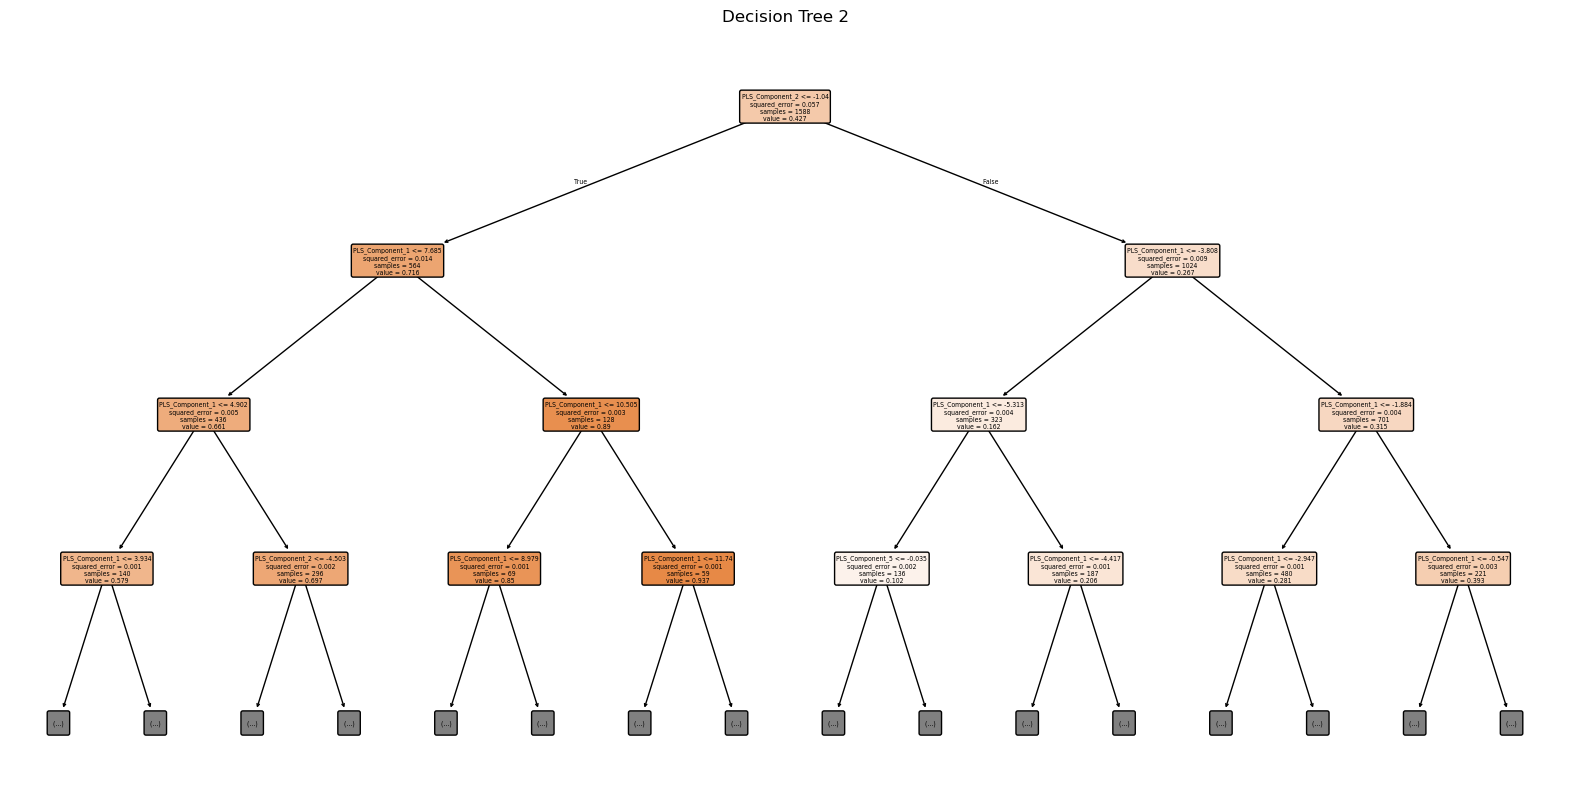

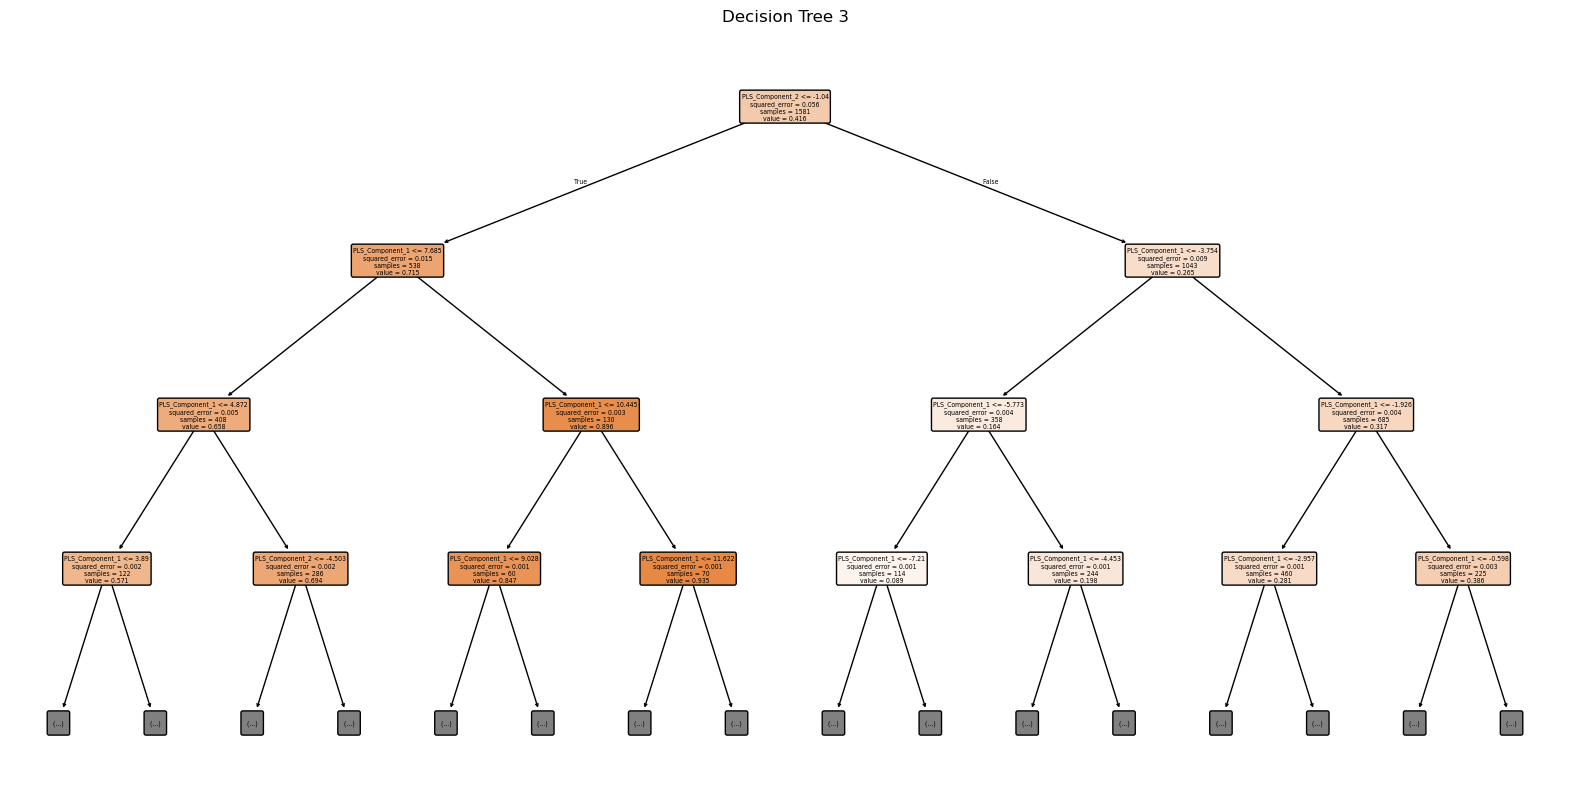

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("klar_for_oppgave_5.csv",index_col=0)
X = df.drop(columns=["Close"])  # Drop the target column
y = df["Close"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Visualize a few trees in the forest using plot_tree
for i in range(3):  # Display the first 3 trees
    plt.figure(figsize=(20, 10))
    plot_tree(rf_regressor.estimators_[i], feature_names=X.columns, filled=True, rounded=True, max_depth=3)
    plt.title(f"Decision Tree {i+1}")   
    plt.show()